# Note

* All airline, all price
* 2023-07-12 : initial-all airlines, remove outlier, tunning Isotonic
* 2023-07-13 : simplify isotonic
* 2023-07-30 : remove 30 days fitting, update simplify isotonic
* 2023-08-11 : update get_slope, get_intercept, get_linear_equation, equations
* 2023-08-12 : add y_hat for LR

# Setup

In [1]:
import os
import pandas as pd
from datetime import datetime, date
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [2]:
# if it is the first time running on the environment please uncomment
# !pip install ipynb

# get_slope

In [3]:
def get_slope(x1, y1, x2, y2):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b1 = ((y1-mean_y)*(x1-mean_x) + (y2-mean_y)*(x2-mean_x))/(math.pow(x1-mean_x,2) + math.pow(x2-mean_x,2))
    return b1

In [4]:
get_slope(2, 3, 6, 7)

1.0

# get_intercept

In [5]:
def get_intercept(x1, y1, x2, y2, b1):
    mean_x = (x1+x2)/2
    mean_y = (y1+y2)/2
    b0 = mean_y - b1*mean_x
    return b0

In [6]:
get_intercept(2, 3, 6, 7, get_slope(2, 3, 6, 7))

1.0

# get_linear_equation

In [7]:
# b0 : intercept
# b1 : slope
# y = b0 + b1*x
def get_linear_equation(b0,b1):
    if b1 != 0 :
        if b1 > 0:
            print('y = %.2f' % b0, '+ %.2f' % b1, '*x' )
        else:
            print('y = %.2f' % b0, ' %.2f' % b1, '*x' )
    else : 
        print('y = %.2f' % b0 )

In [8]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


In [9]:
get_linear_equation(2.3333,4.567)

y = 2.33 + 4.57 *x


# 60 days prior

## Read CSV

In [10]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data_60days\\data_files_for_model\\'

In [11]:
# ref : https://towardsdatascience.com/how-to-read-csv-file-using-pandas-ab1f5e7e7b58
file_name = folder + 'ticket_price_BKK_direct__2023-07-12_16-11-32.csv'
df = pd.read_csv(file_name)

In [12]:
df

route    airline_nm  direct depart_dt col_pre_depart_dt   search_dt  \
0    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-25   
1    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-26   
2    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-27   
3    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-28   
4    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-29   
..          ...           ...     ...       ...               ...         ...   
864  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-27   
865  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-28   
866  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-28   
867  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-29   
868  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-29   

     col_days_bf_depart  ticket_price  price_on_depart_date  col_saving_rate  \
0                   -60         455.0                 530.0        14.150943   
1                   -59         455.0                 530.0        14.150943   
2                   -58         453.0                 530.0        14.528302   
3                   -57         455.0                 530.0        14.150943   
4                   -56         456.0                 530.0        13.962264   
..                  ...           ...                   ...              ...   
864                  -3         496.0                 469.0        -5.756930   
865                  -2         588.0                 565.0        -4.070796   
866                  -2         475.0                 469.0        -1.279318   
867                  -1         589.0                 565.0        -4.247788   
868                  -1         478.0                 469.0        -1.918977   

    col_day_of_week  
0         Wednesday  
1         Wednesday  
2         Wednesday  
3         Wednesday  
4         Wednesday  
..              ...  
864         Tuesday  
865         Tuesday  
866         Tuesday  
867         Tuesday  
868         Tuesday  

[869 rows x 11 columns]

## plot graph

Raw data  869


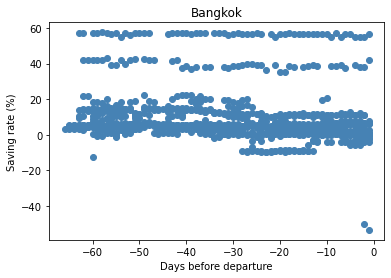

In [13]:
print("Raw data ", len(df['col_days_bf_depart']))
plt.scatter(df['col_days_bf_depart'], df['col_saving_rate'], color = 'steelblue')
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## Remove outlier

In [14]:
folder = 'C:\\Users\\Pleng Weerada\\Documents\\MSc Project\\flight_data_60days\\data_files_for_model\\'
file_name = folder + 'ticket_price_BKK_direct__2023-07-12_16-11-32.csv'
df_removeOutlier = pd.read_csv(file_name)

In [15]:
df_removeOutlier

route    airline_nm  direct depart_dt col_pre_depart_dt   search_dt  \
0    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-25   
1    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-26   
2    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-27   
3    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-28   
4    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-29   
..          ...           ...     ...       ...               ...         ...   
864  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-27   
865  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-28   
866  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-28   
867  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-29   
868  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-29   

     col_days_bf_depart  ticket_price  price_on_depart_date  col_saving_rate  \
0                   -60         455.0                 530.0        14.150943   
1                   -59         455.0                 530.0        14.150943   
2                   -58         453.0                 530.0        14.528302   
3                   -57         455.0                 530.0        14.150943   
4                   -56         456.0                 530.0        13.962264   
..                  ...           ...                   ...              ...   
864                  -3         496.0                 469.0        -5.756930   
865                  -2         588.0                 565.0        -4.070796   
866                  -2         475.0                 469.0        -1.279318   
867                  -1         589.0                 565.0        -4.247788   
868                  -1         478.0                 469.0        -1.918977   

    col_day_of_week  
0         Wednesday  
1         Wednesday  
2         Wednesday  
3         Wednesday  
4         Wednesday  
..              ...  
864         Tuesday  
865         Tuesday  
866         Tuesday  
867         Tuesday  
868         Tuesday  

[869 rows x 11 columns]

In [16]:
# taken from : https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
median = df_removeOutlier['col_saving_rate'].quantile(0.5)
Q1 = df_removeOutlier['col_saving_rate'].quantile(0.25)
Q3 = df_removeOutlier['col_saving_rate'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print('median %.4f' % median)
print('Q1 {0:.4f},Q3 {1:.4f}, IQR {2:.4f}, upper {3:.4f},lower {4:.4f}'.format(Q1, Q3, IQR, upper, lower))
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_removeOutlier['col_saving_rate']>=upper)[0]
lower_array = np.where(df_removeOutlier['col_saving_rate']<=lower)[0]
 
# # Removing the outliers
df_removeOutlier.drop(index=upper_array, inplace=True)
df_removeOutlier.drop(index=lower_array, inplace=True)
 
# # Print the new shape of the DataFrame
print("New Shape: ", df_removeOutlier.shape)

median 5.6897
Q1 2.5105,Q3 12.6415, IQR 10.1310, upper 27.8381,lower -12.6861
New Shape:  (760, 11)


## plot graph (af remove outlier)

Data after outliner removal


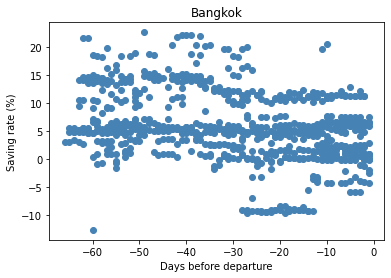

In [17]:
print("Data after outliner removal")
plt.scatter(df_removeOutlier['col_days_bf_depart'], df_removeOutlier['col_saving_rate'], color = 'steelblue')
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")
plt.show()

## 1) LR

In [18]:
import numpy as np

x = []
y = []
for index, row in df_removeOutlier.iterrows():
    x.append([row['col_days_bf_depart']])
    y.append([row['col_saving_rate']])
    
len(x), len(y)

(760, 760)

Linear regression------------------------------
Coefficients: [[-0.1049213]] 
Intercept: [2.55169918]
y_hat = 2.55  -0.10 x
Mean squared error: 33.96
Mean absolute error: 4.58
Coefficient of determination: 0.10


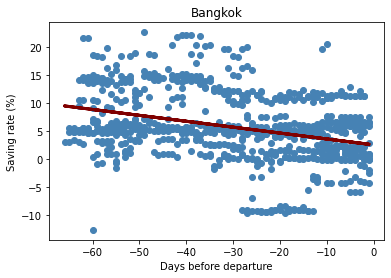

In [19]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create linear regression object
lnr_clf = linear_model.LinearRegression()

# Train the model using the training sets
lnr_clf.fit(x, y)

# predit saving rate using train data
lnr_y_pred = lnr_clf.predict(x)

print("Linear regression" + "-"*30)
print("Coefficients: {0} \nIntercept: {1}".format(lnr_clf.coef_, lnr_clf.intercept_))
print("y_hat = %.2f" % lnr_clf.intercept_[0] , ' %.2f' % lnr_clf.coef_[0][0], 'x' )

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, lnr_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, lnr_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(x, lnr_y_pred, color = 'maroon', linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

## 2) Isotonic

In [20]:
df_removeOutlier

route    airline_nm  direct depart_dt col_pre_depart_dt   search_dt  \
0    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-25   
1    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-26   
2    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-27   
3    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-28   
4    LON-to-BKK  Thai Airways  direct      24/5        2023-05-24  2023-03-29   
..          ...           ...     ...       ...               ...         ...   
864  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-27   
865  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-28   
866  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-28   
867  LON-to-BKK       EVA Air  direct      30/5        2023-05-30  2023-05-29   
868  LON-to-BKK  Thai Airways  direct      30/5        2023-05-30  2023-05-29   

     col_days_bf_depart  ticket_price  price_on_depart_date  col_saving_rate  \
0                   -60         455.0                 530.0        14.150943   
1                   -59         455.0                 530.0        14.150943   
2                   -58         453.0                 530.0        14.528302   
3                   -57         455.0                 530.0        14.150943   
4                   -56         456.0                 530.0        13.962264   
..                  ...           ...                   ...              ...   
864                  -3         496.0                 469.0        -5.756930   
865                  -2         588.0                 565.0        -4.070796   
866                  -2         475.0                 469.0        -1.279318   
867                  -1         589.0                 565.0        -4.247788   
868                  -1         478.0                 469.0        -1.918977   

    col_day_of_week  
0         Wednesday  
1         Wednesday  
2         Wednesday  
3         Wednesday  
4         Wednesday  
..              ...  
864         Tuesday  
865         Tuesday  
866         Tuesday  
867         Tuesday  
868         Tuesday  

[760 rows x 11 columns]

In [21]:
x = df_removeOutlier['col_days_bf_depart'].to_numpy()
y = df_removeOutlier['col_saving_rate'].to_numpy()

type(x), x.shape, type(y), y.shape

(numpy.ndarray, (760,), numpy.ndarray, (760,))

Iso ------------------------------
param: 
{'increasing': False, 'out_of_bounds': 'nan', 'y_max': None, 'y_min': None}
Mean squared error: 32.04
Mean absolute error: 4.58
Coefficient of determination: 0.15


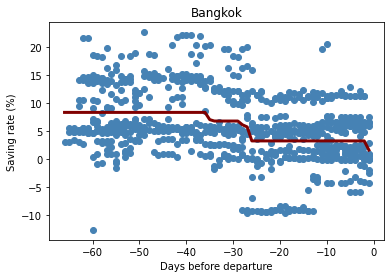

In [22]:
from sklearn.isotonic import IsotonicRegression

# classifier creation
iso_clf = IsotonicRegression(increasing = False) # same as auto

# train model & predict
iso_y_pred = iso_clf.fit_transform(x, y)

print("Iso " + "-"*30)
print("param: \n{0}".format(iso_clf.get_params()))

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, lnr_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color = 'steelblue')
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)

plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

In [23]:
iso_clf.X_thresholds_, len(iso_clf.X_thresholds_)

(array([-66., -36., -35., -34., -29., -28., -27., -26.,  -2.,  -1.]), 10)

In [24]:
iso_clf.y_thresholds_

array([8.32738734, 8.32738734, 7.04078949, 6.7890657 , 6.7890657 ,
       6.11621389, 5.74662653, 3.25458651, 3.25458651, 1.63131558])

Isotonic Regression


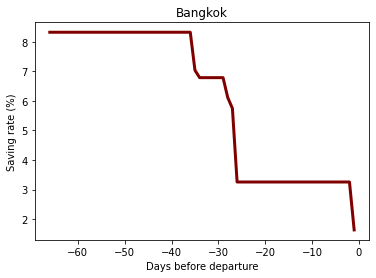

In [25]:
print("Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color = 'maroon', linewidth=3)
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Simplify

In [26]:
x_sim = [-66 ,-36 ,-26 ,-2 ,-1 ]
y_sim = [8.32738734 ,8.32738734 ,3.25458651 ,3.25458651 ,1.63131558 ]

Simplified Isotonic Regression


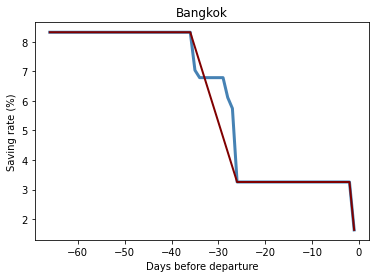

In [27]:
print("Simplified Isotonic Regression")
plt.plot(iso_clf.X_thresholds_, iso_clf.y_thresholds_, color="steelblue", linewidth=3, label="Isotonic")
plt.plot(x_sim, y_sim, color="maroon", linewidth=2, label="Isotonic Simplify")

plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Equation

In [28]:
# for i in range(0, len(x_sim)-1):
#     print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
#     m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
#     print('slope ', m)

#     c = get_intercept(x_sim[i], y_sim[i], m)
#     print('intercept ', c)

#     get_linear_equation(m,c)

In [29]:
x_sim, y_sim

([-66, -36, -26, -2, -1],
 [8.32738734, 8.32738734, 3.25458651, 3.25458651, 1.63131558])

In [30]:
for i in range(0, len(x_sim)-1):
    print("-"*30, "\n", "{0}: x in [{1},{2}]".format(i+1, x_sim[i], x_sim[i+1]))
    # m = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    b1 = get_slope(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1])
    print('slope ', b1)

    b0 = get_intercept(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print(x_sim[i], y_sim[i], x_sim[i+1], y_sim[i+1], b1)
    print('intercept ', b0)

    get_linear_equation(b0,b1)

------------------------------ 
 1: x in [-66,-36]
slope  0.0
-66 8.32738734 -36 8.32738734 0.0
intercept  8.32738734
y = 8.33
------------------------------ 
 2: x in [-36,-26]
slope  -0.5072800829999999
-36 8.32738734 -26 3.25458651 -0.5072800829999999
intercept  -9.934695647999998
y = -9.93  -0.51 *x
------------------------------ 
 3: x in [-26,-2]
slope  0.0
-26 3.25458651 -2 3.25458651 0.0
intercept  3.25458651
y = 3.25
------------------------------ 
 4: x in [-2,-1]
slope  -1.6232709300000001
-2 3.25458651 -1 1.63131558 -1.6232709300000001
intercept  0.008044649999999987
y = 0.01  -1.62 *x


### MSE

In [31]:
def predict_BKK(x):
    y = 0
    if x >= -66 and x < -36:
        y = 8.33
    elif x >= -36 and x < -26:
        y = -9.93  -0.51 *x
    elif x >= -26 and x < -2:
        y = 3.25
    else:
        y = 0.01  -1.62 *x
    return y

Iso (simpliflied)------------------------------
Mean squared error: 32.42
Mean absolute error: 4.63
Coefficient of determination: 0.14


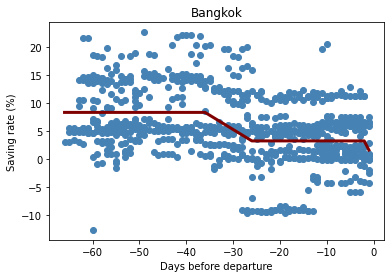

In [32]:
# predict using simpliflied isotonic
iso_y_pred = []
for i in x:
    iso_y_pred.append(predict_BKK(i))

print("Iso (simpliflied)" + "-"*30)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, iso_y_pred))  # the best value is 0.0

# The mean absolute error
print("Mean absolute error: %.2f" % mean_absolute_error(y, iso_y_pred))  # the best value is 0.0

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, iso_y_pred))

# Plot outputs
plt.scatter(x, y, color="steelblue")
plt.plot(x_sim, y_sim, color="maroon", linewidth=3)

# plt.xticks(())
# plt.yticks(())
plt.title("Bangkok")
plt.xlabel("Days before departure")
plt.ylabel("Saving rate (%)")

plt.show()

### Result

* non-increasing period during -66 to -36, -26 to -2
* price increase after day -36 until day -26, and increasing again on day -1